In [2]:
#import inspect

import matplotlib.pyplot as plt
from plot_results import collect_data, plot_training_curves

from arguments import prepare_finetuning_args, Args
args = prepare_finetuning_args()

# Leggere il file di log
#log_file_path = './output/log_sup.txt'
#log_file_path = './output/log_pretrainTrue.txt'
log_file_path = './output/log_12h.txt'
log_file_path = './output/log_12h_cloudy.txt'
log_file_path = './output/log_CL10.txt'
log_file_path = './output/log_CL10_2596.txt'
log_file_path = './output/log_CL10_2.txt'
log_file_path = './output/log_3342.txt'
log_file_path = './output/log_CL10_cloudy_714.txt'
log_file_path_best = './output/log_medicanes_600.txt'
log_file_path = './output/log_medicanes_600_lr1.txt'
log_file_path = './output/log_medicanes_600_lr2.txt'
log_file_path = './output/log_medicanes_600_lr7.txt'
log_file_path = './output/log_medicanes_600_lr9.txt'


# Plot loss

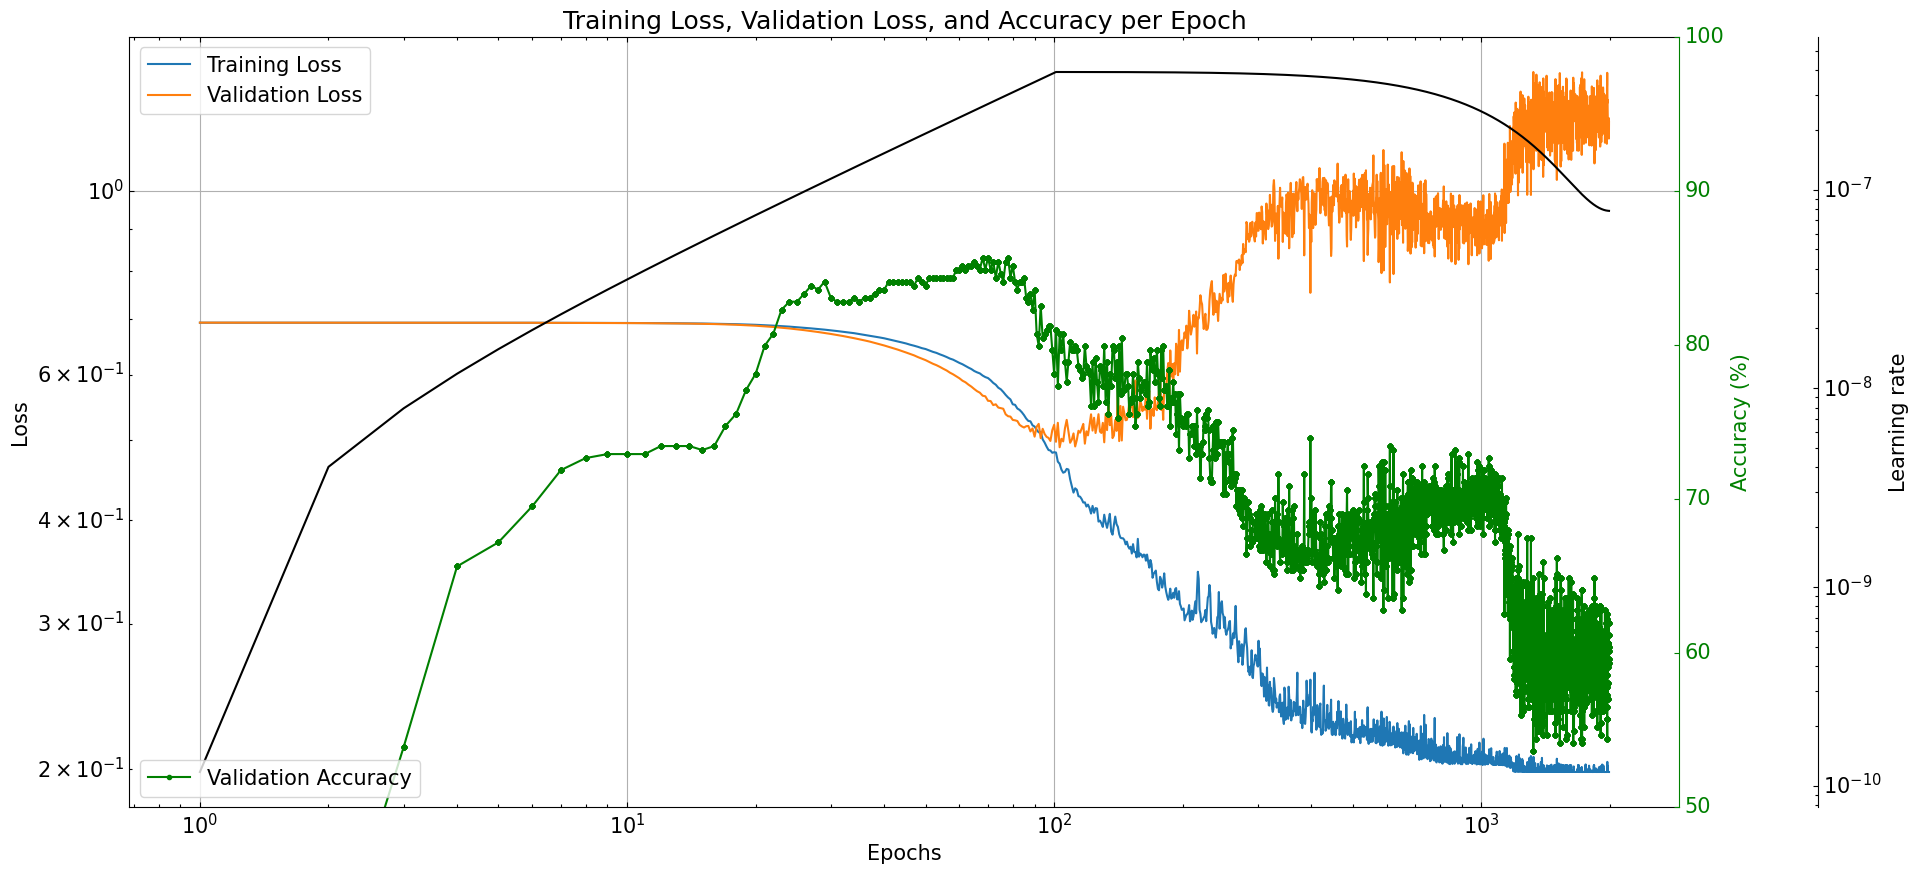

In [3]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr10.txt')) 

### altri

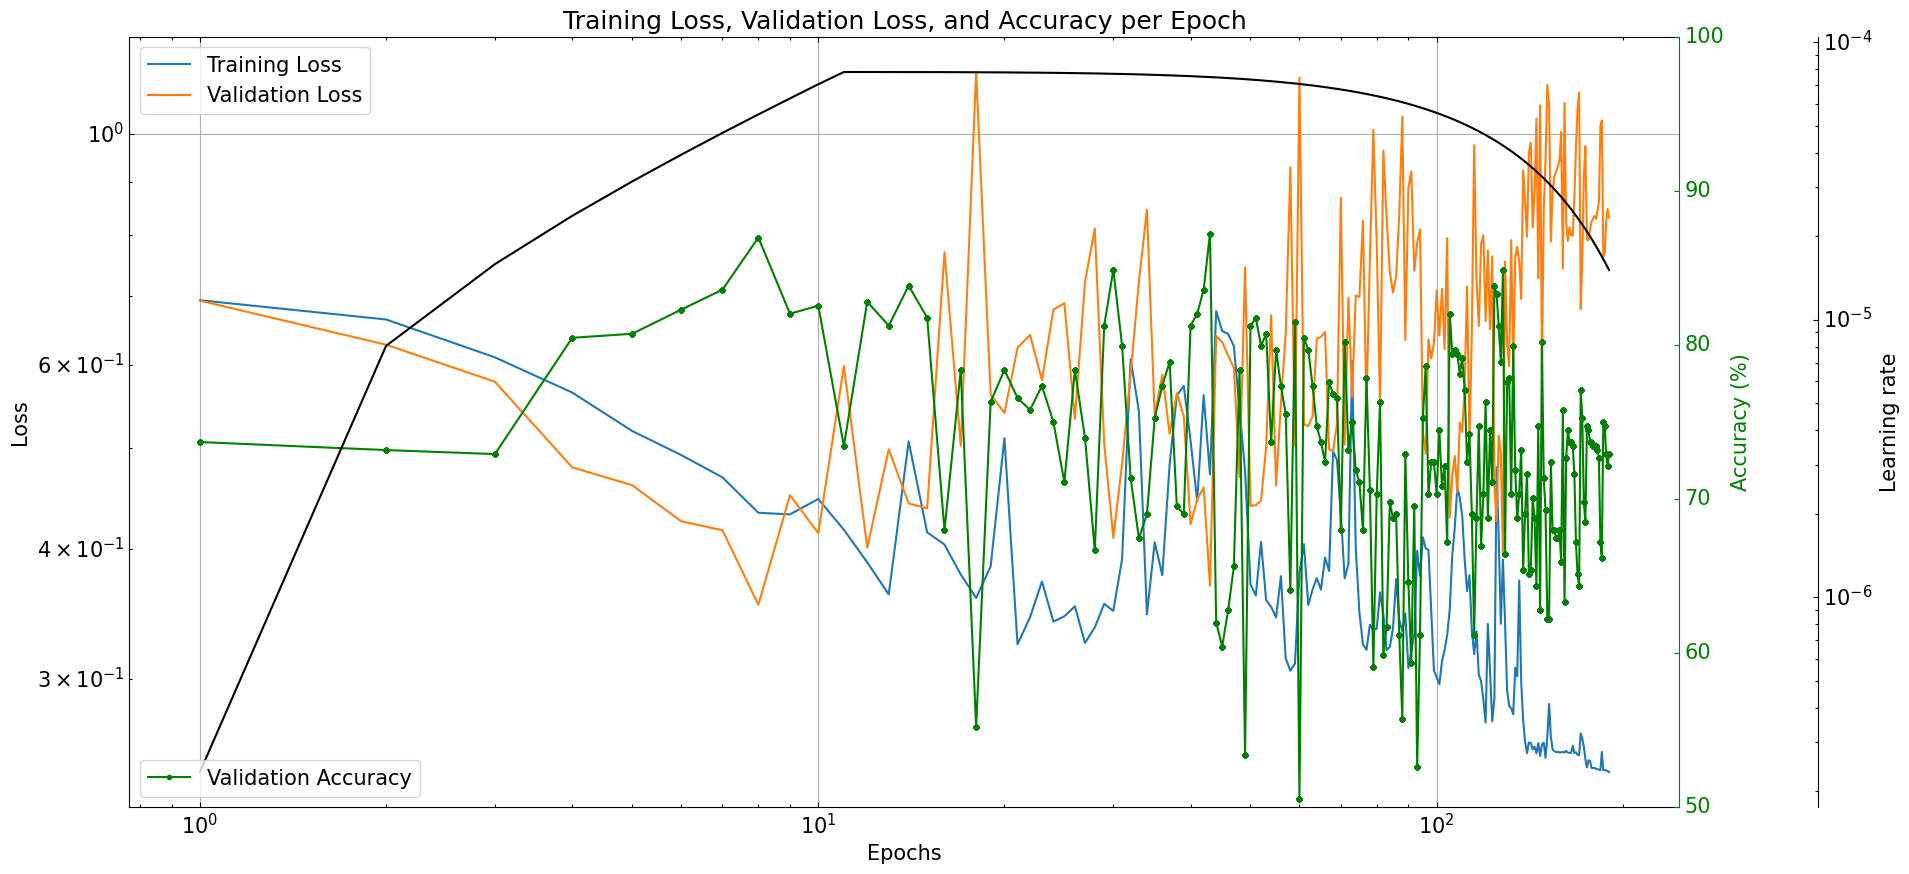

In [11]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr6.txt')) 

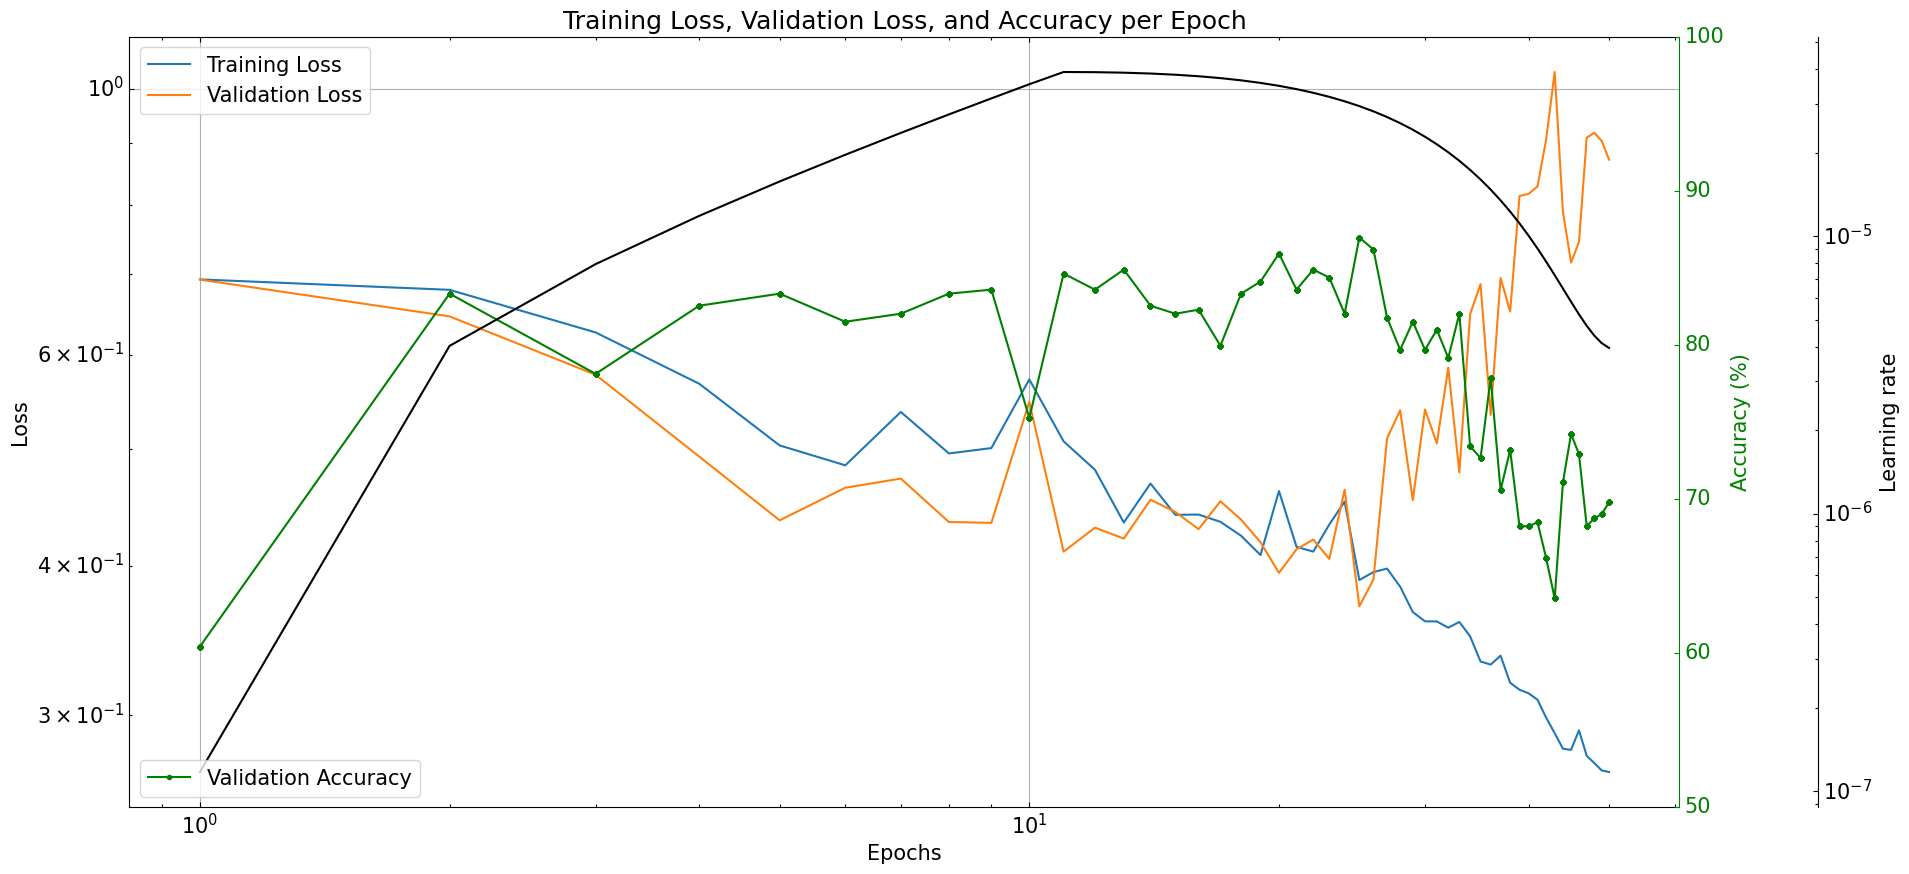

In [10]:
plot_training_curves(collect_data('./output/log_medicanes_600_lr5.txt')) #, plot_file_name="loss_medicanes_only_90%.png")

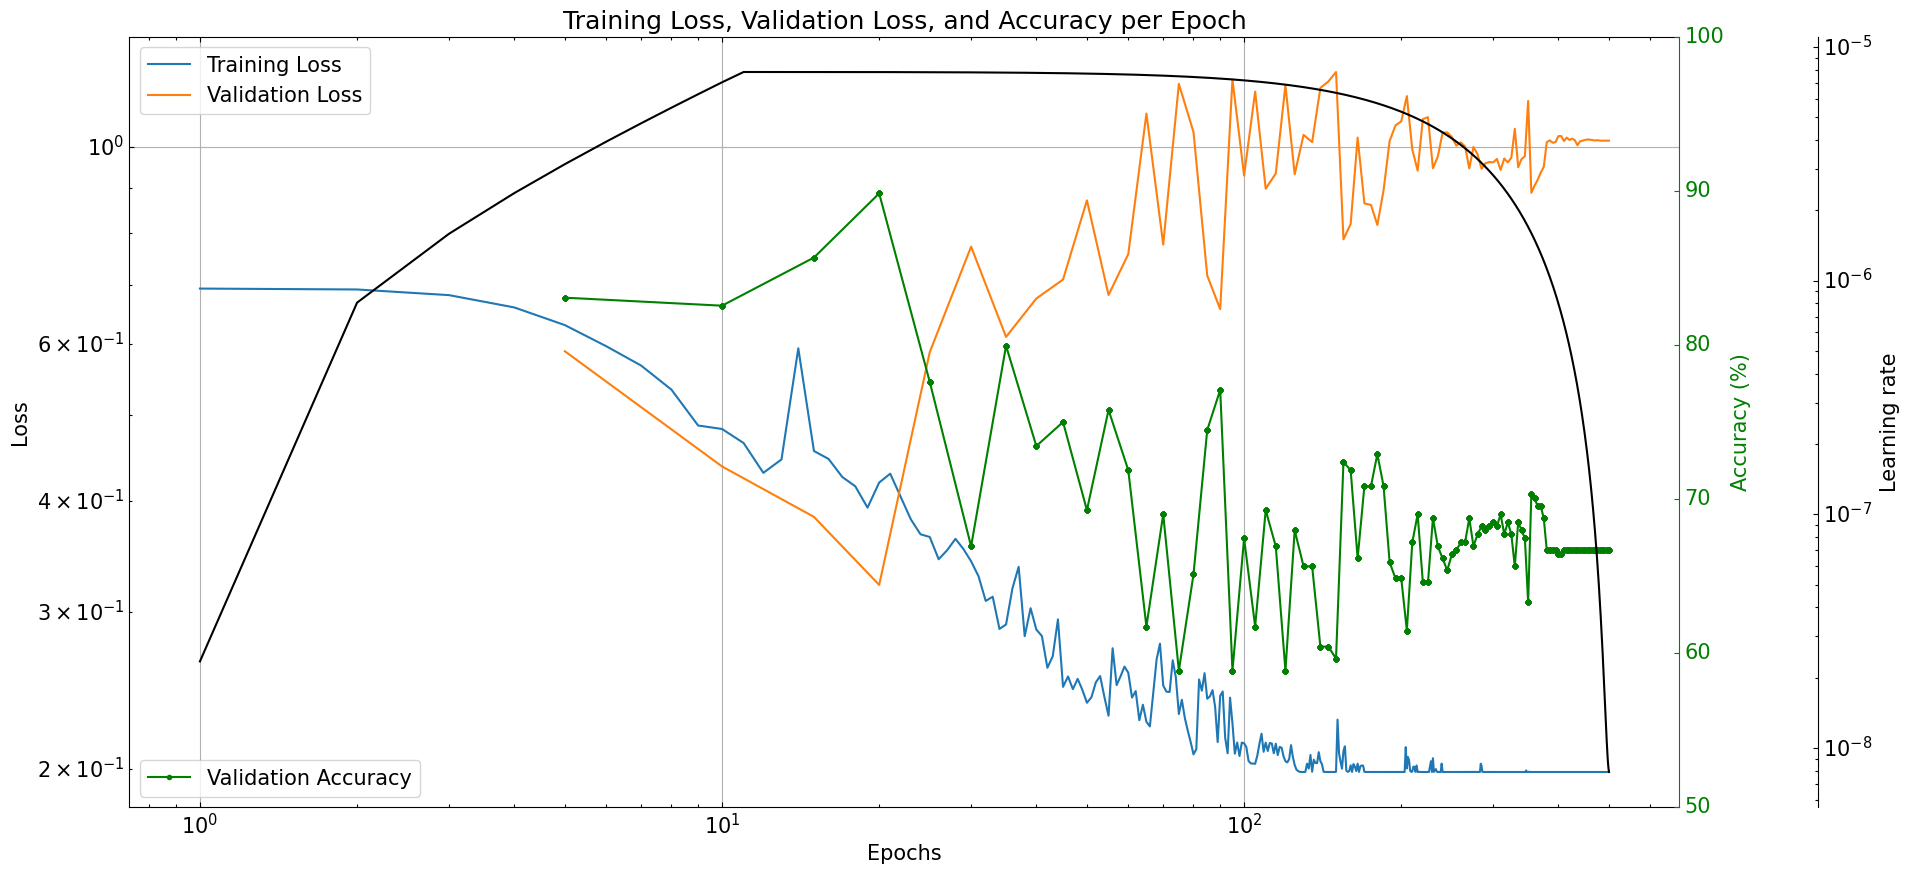

### old

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

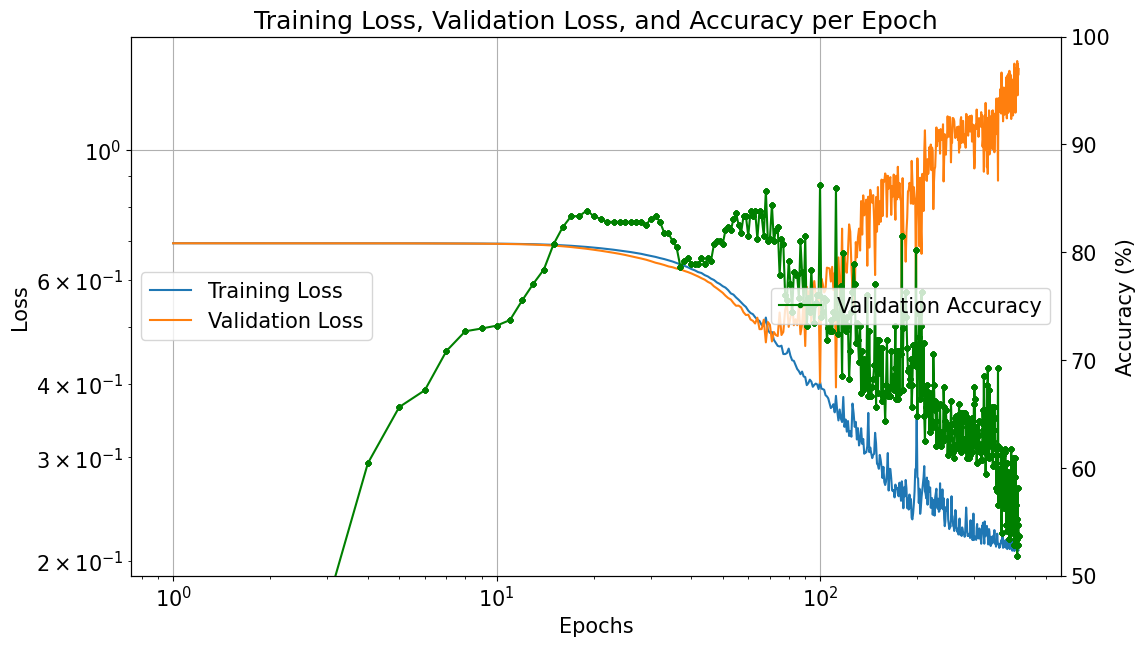

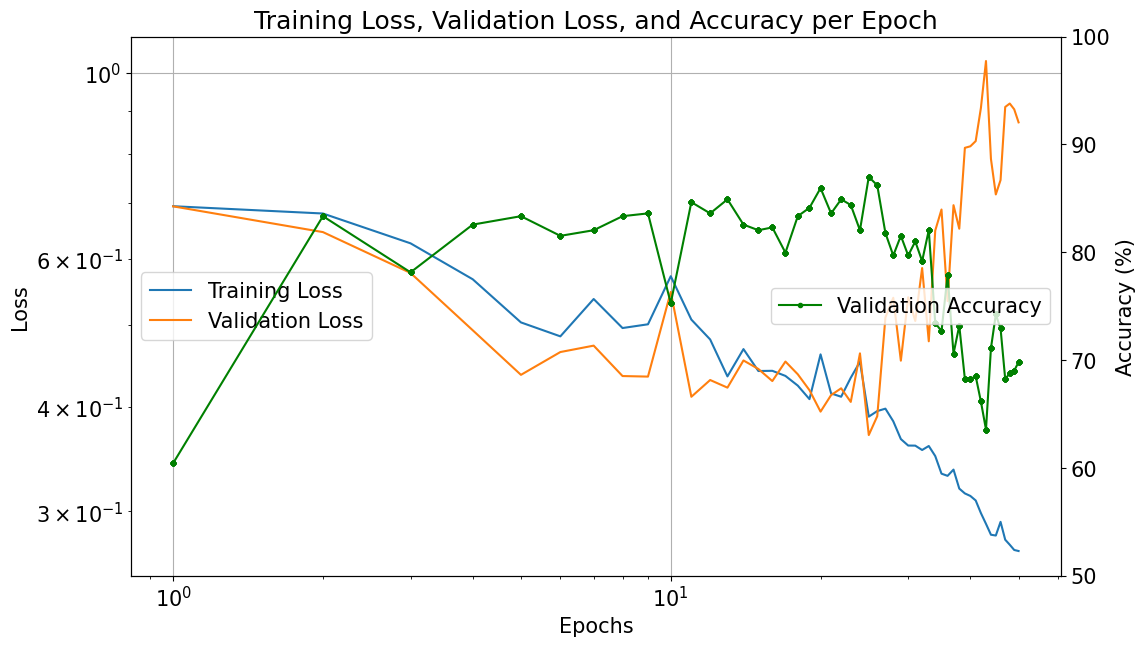

In [ ]:

#plt.show()

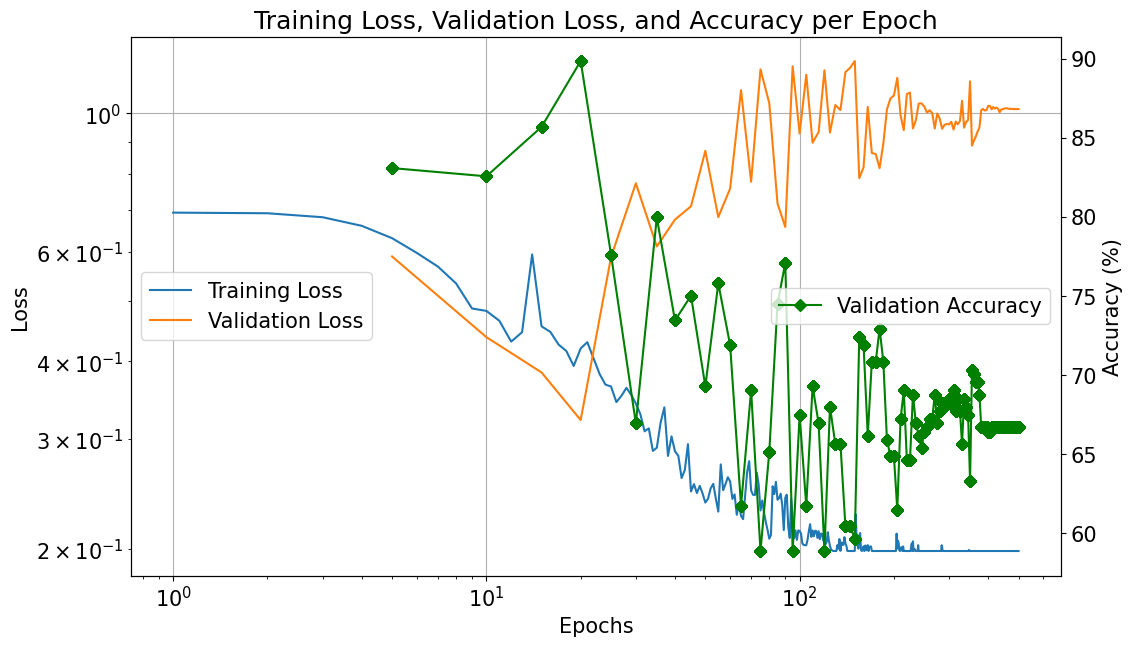

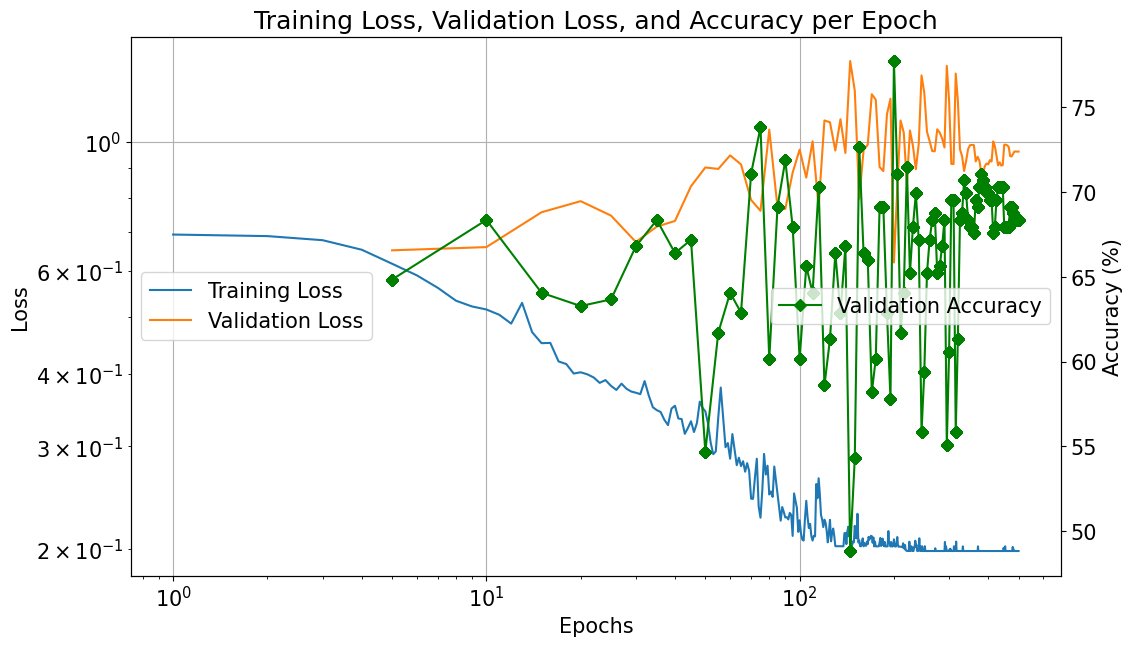

In [5]:
2*5000/60/60

2.7777777777777777

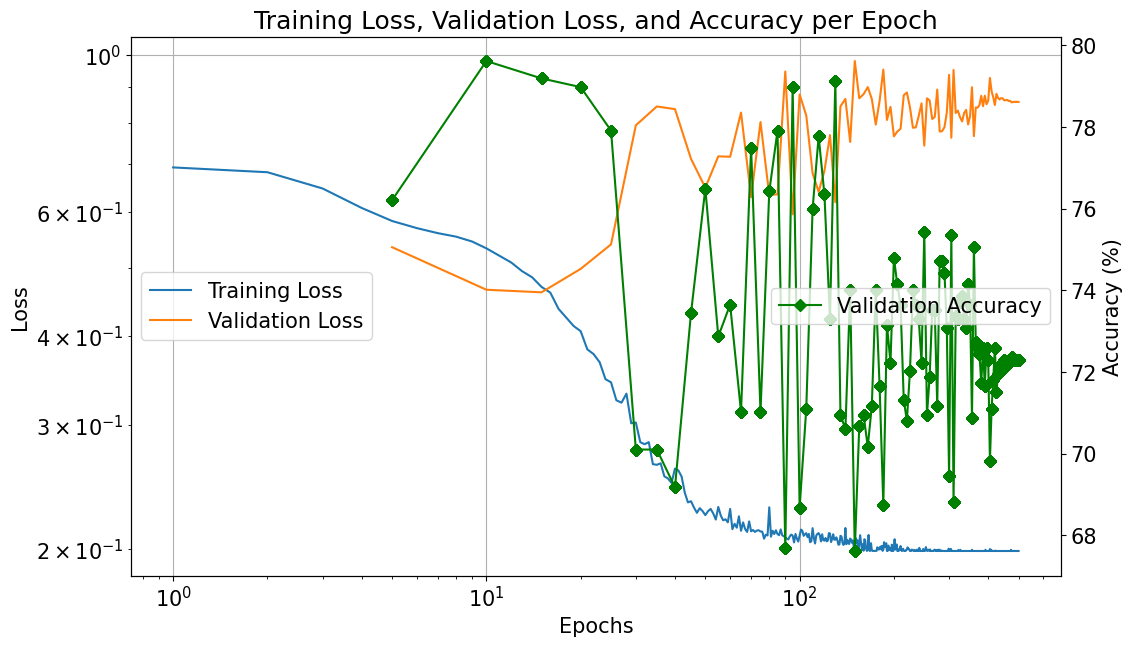

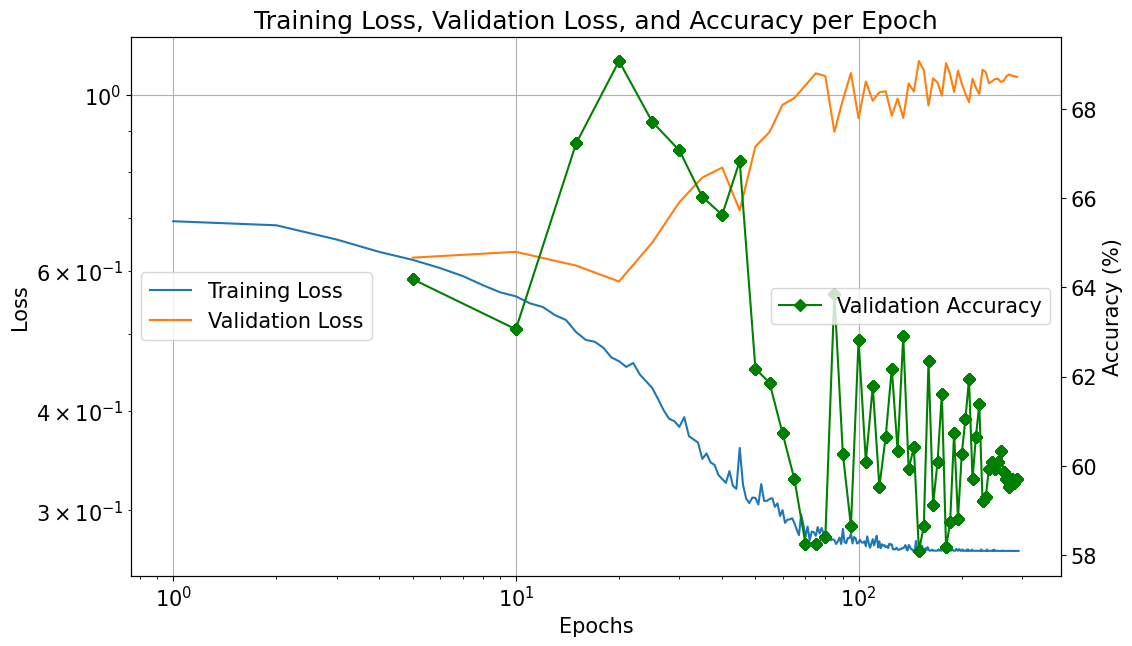

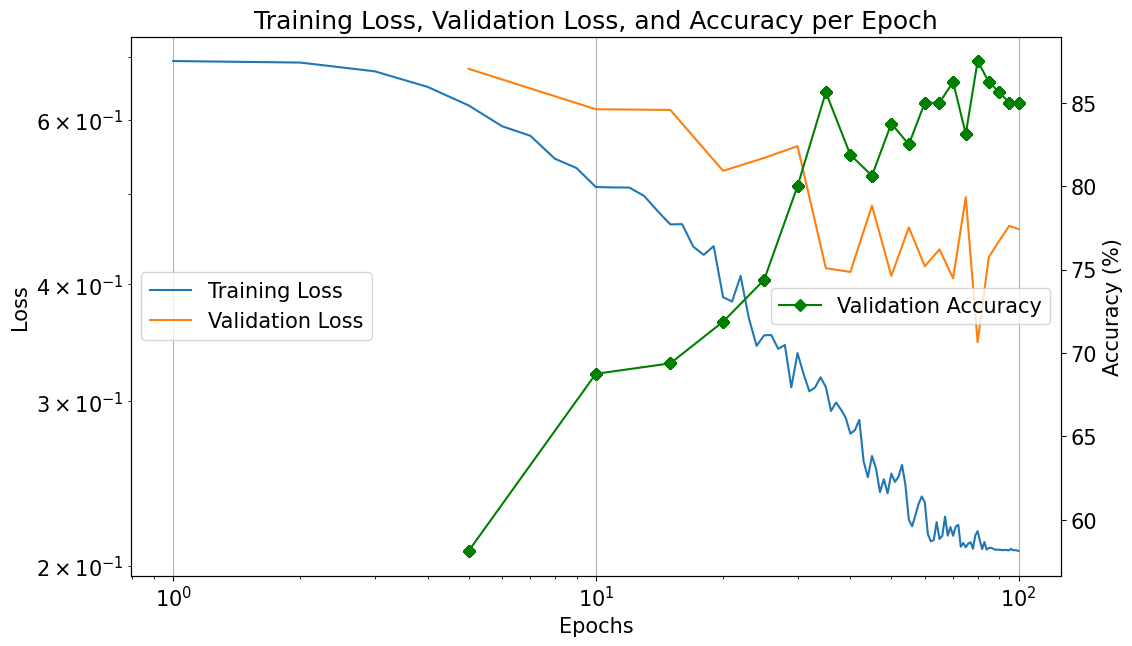

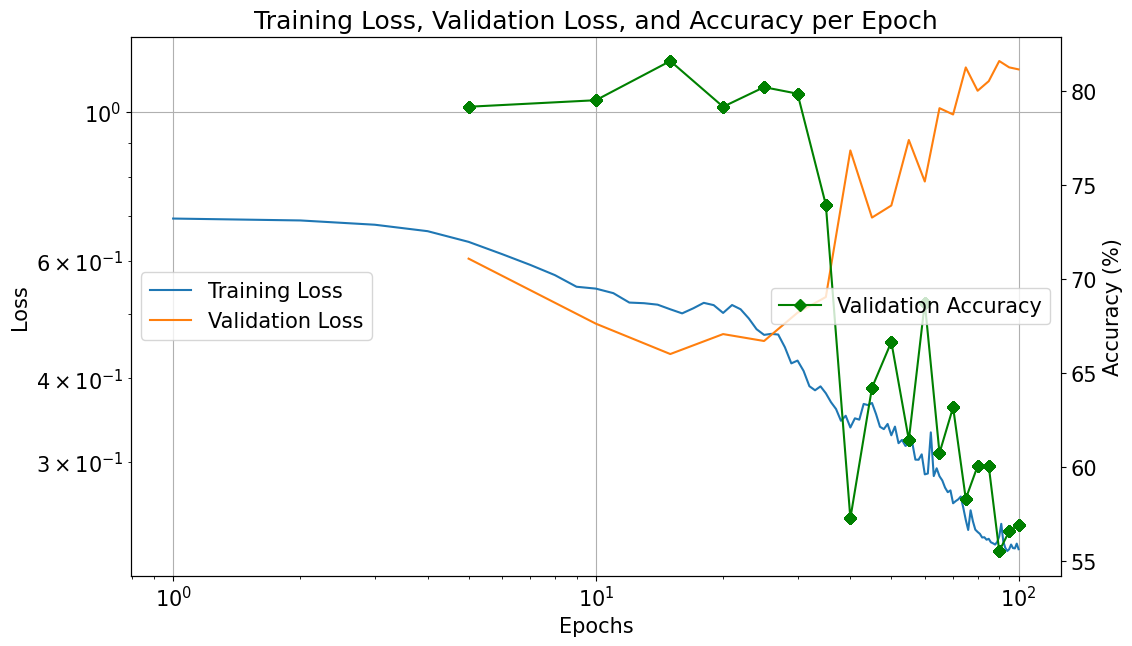

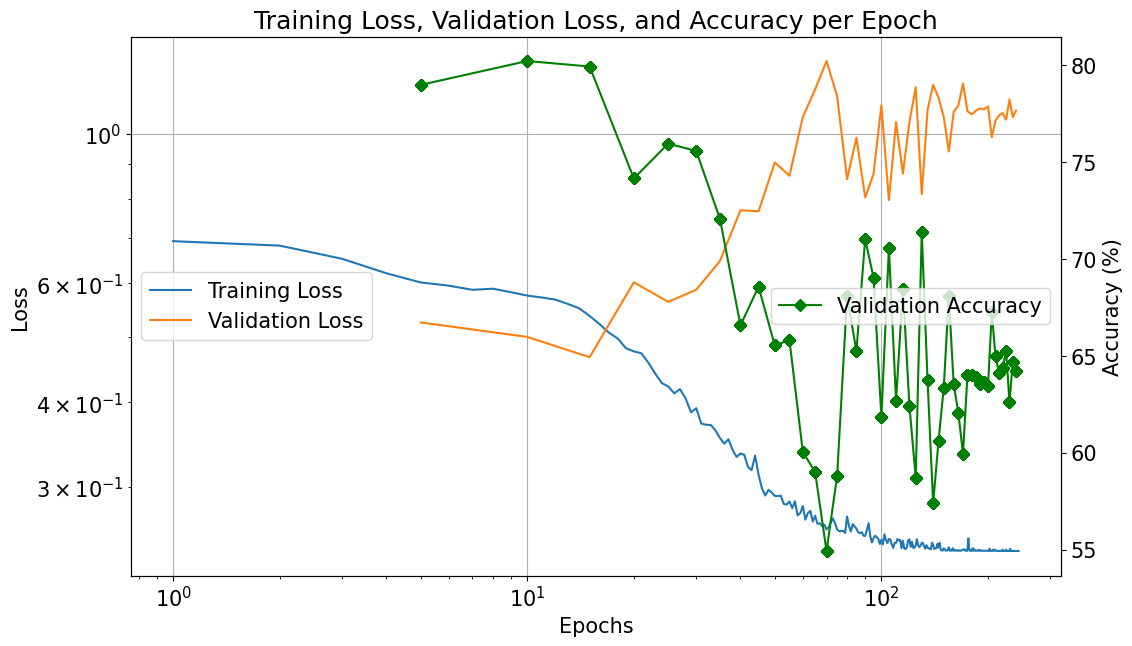

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

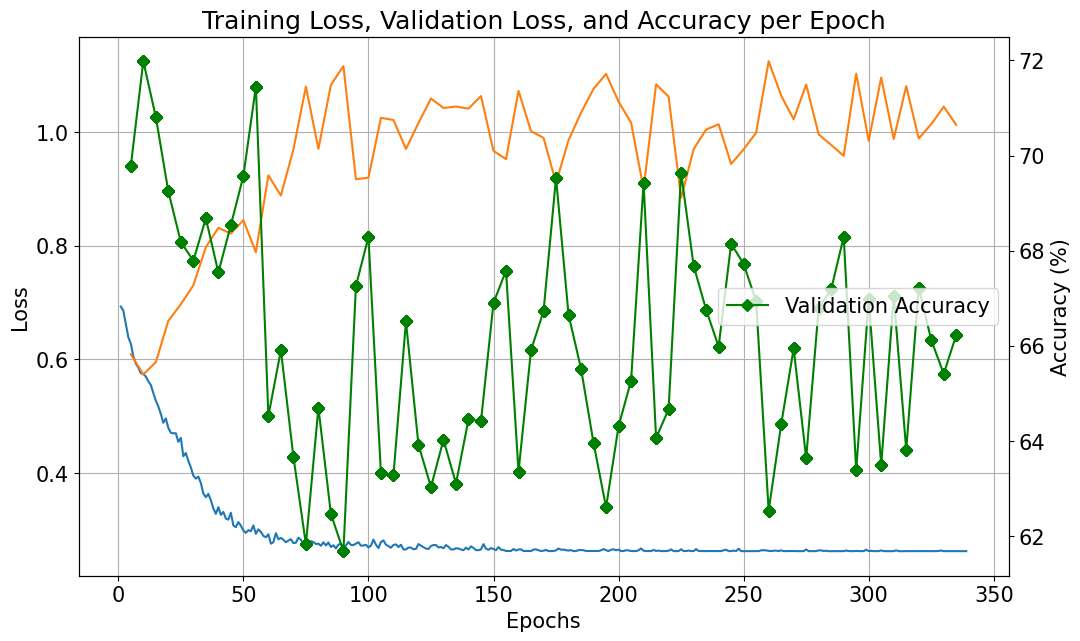

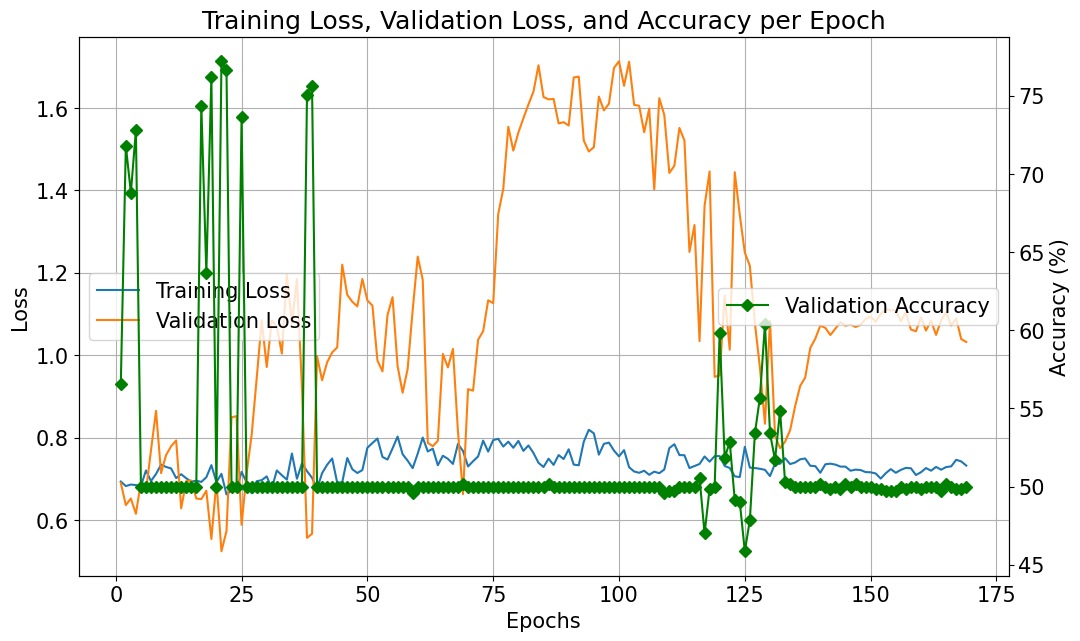

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

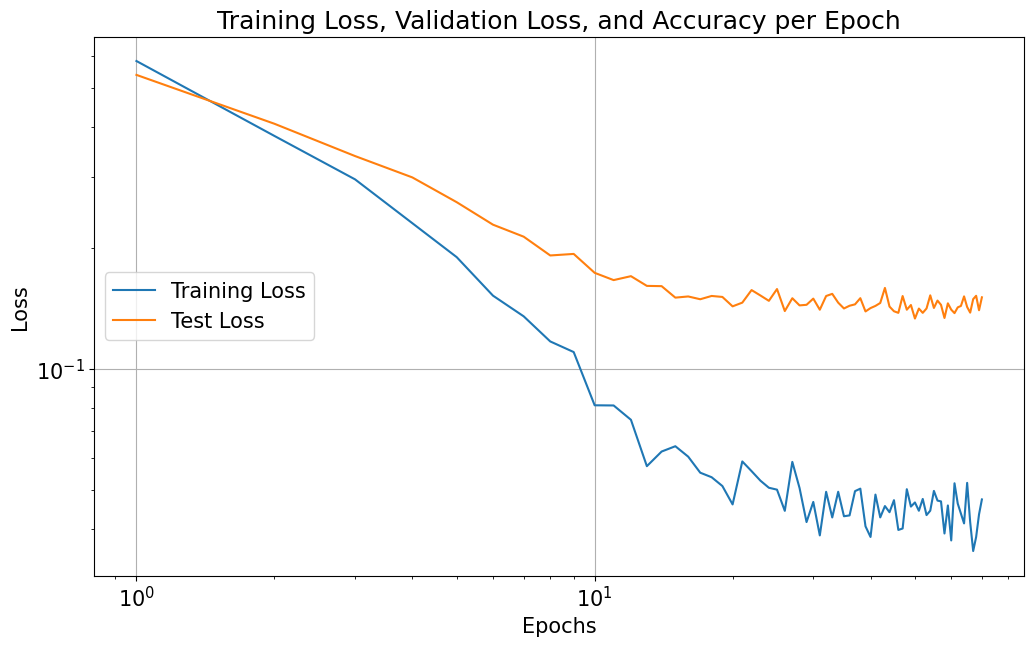

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

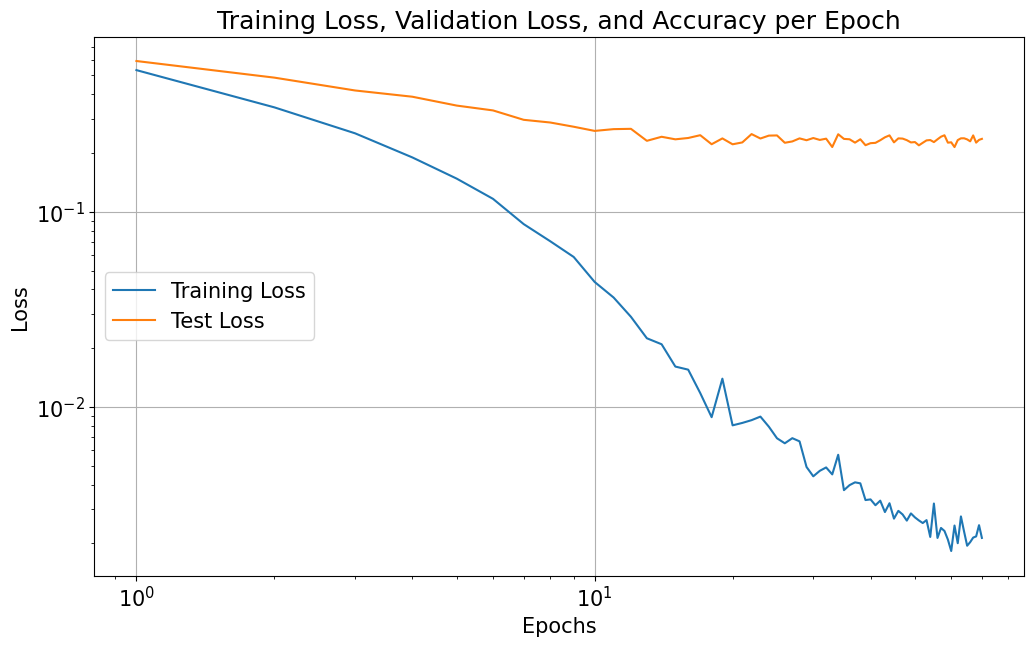

Text(0.5, 1.0, 'Training Loss, Validation Loss, and Accuracy per Epoch')

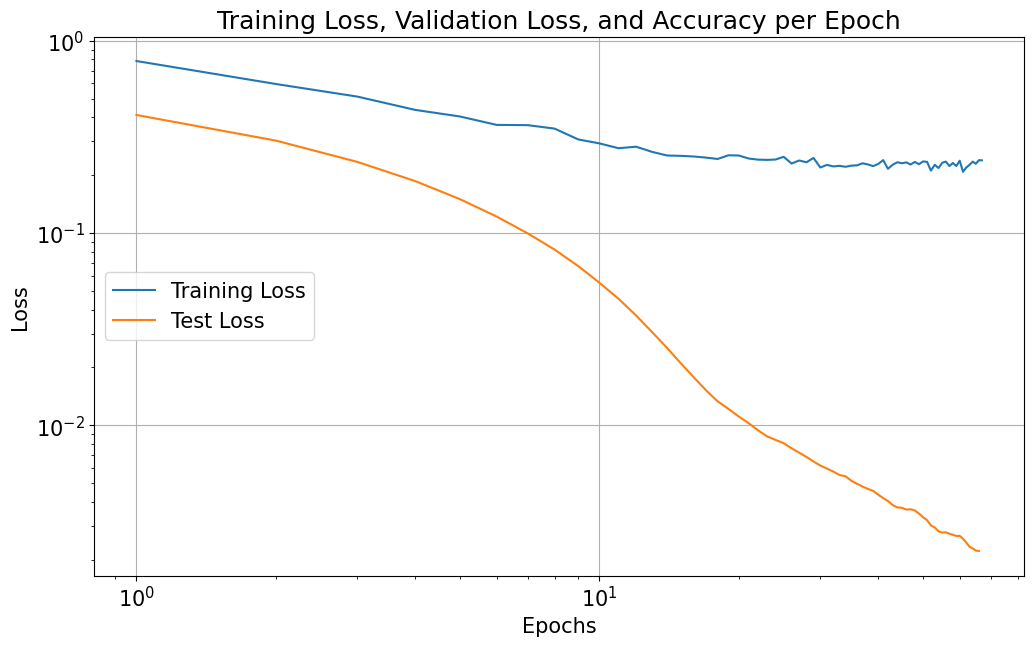

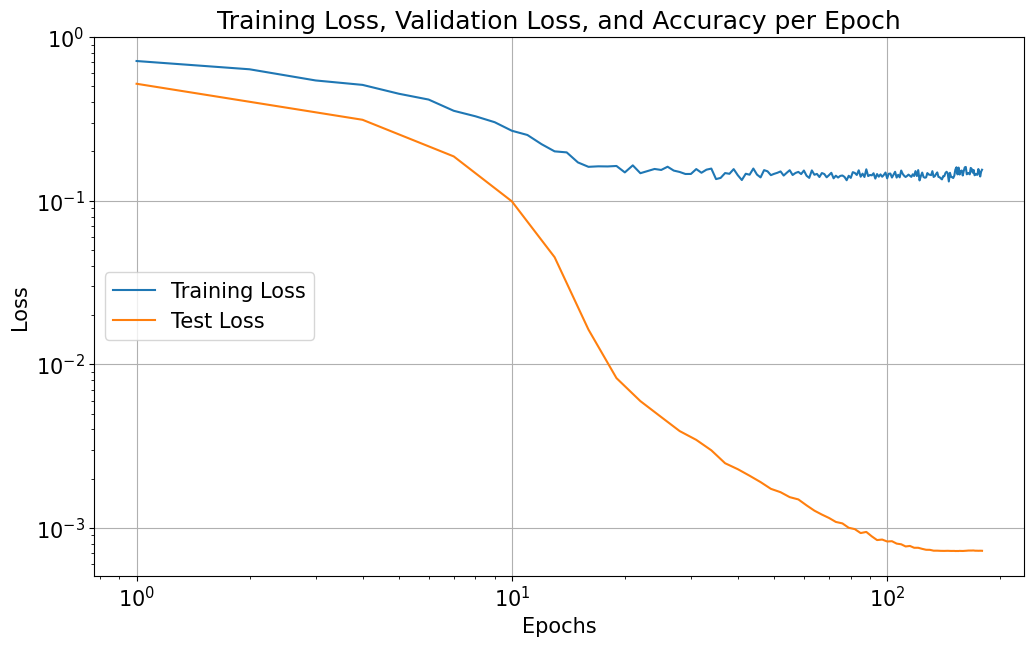

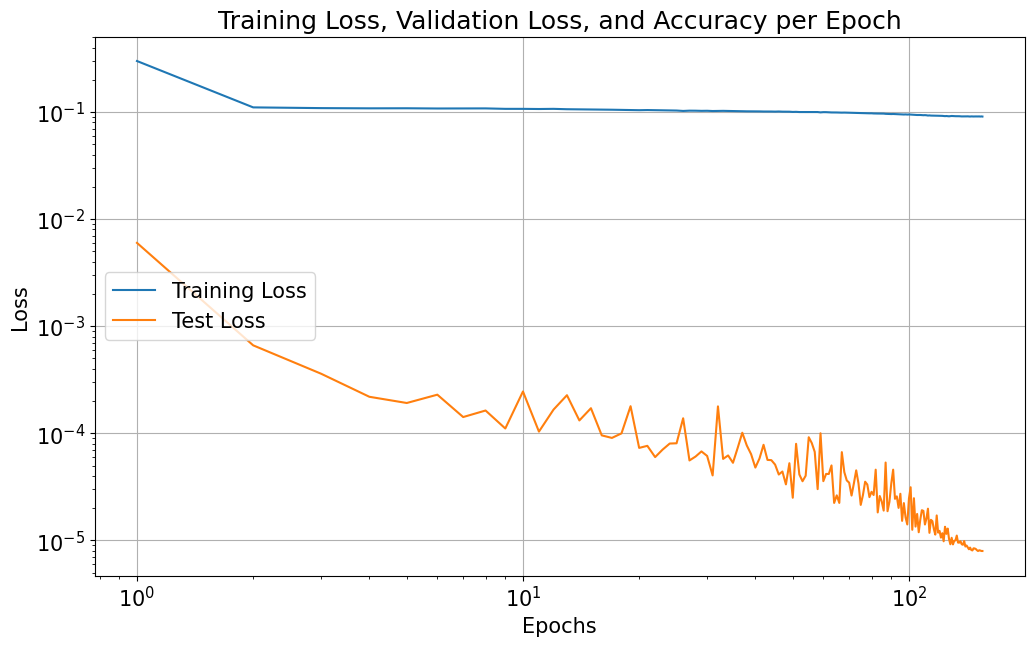

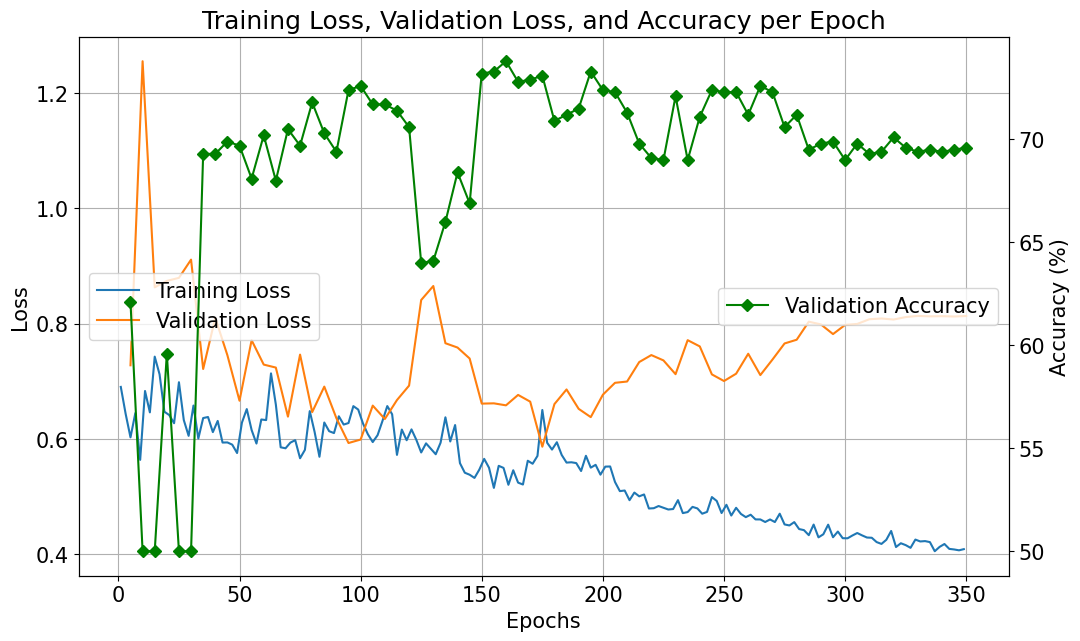

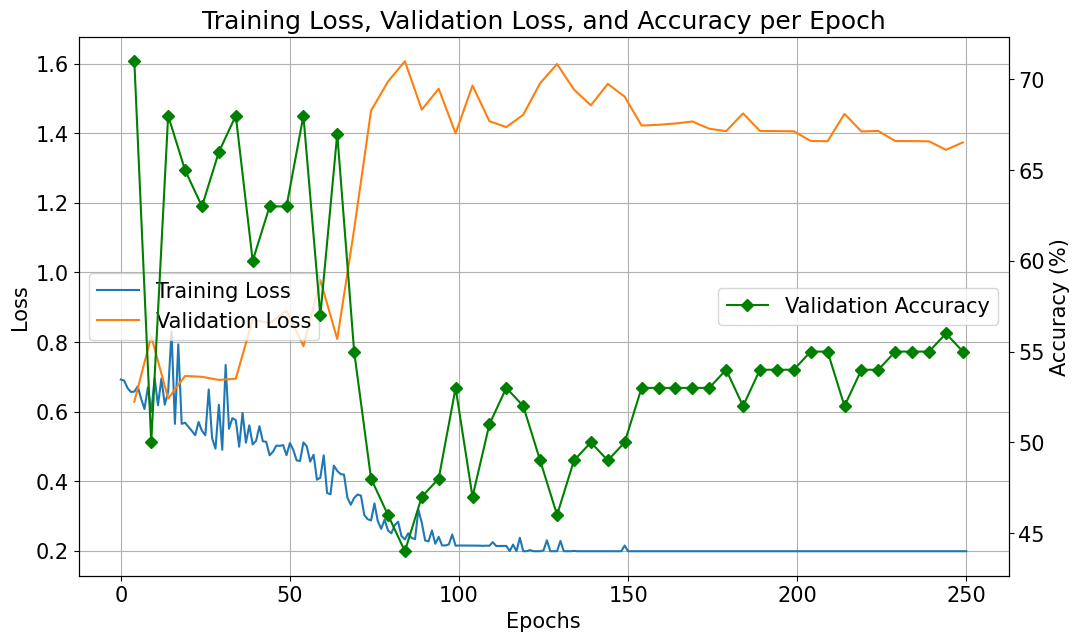

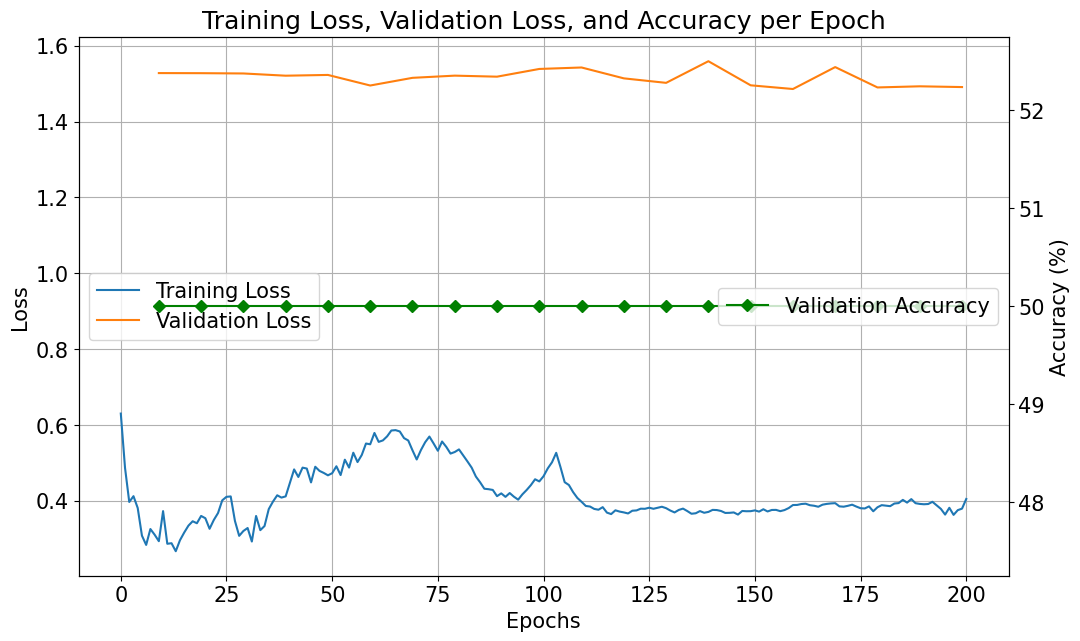

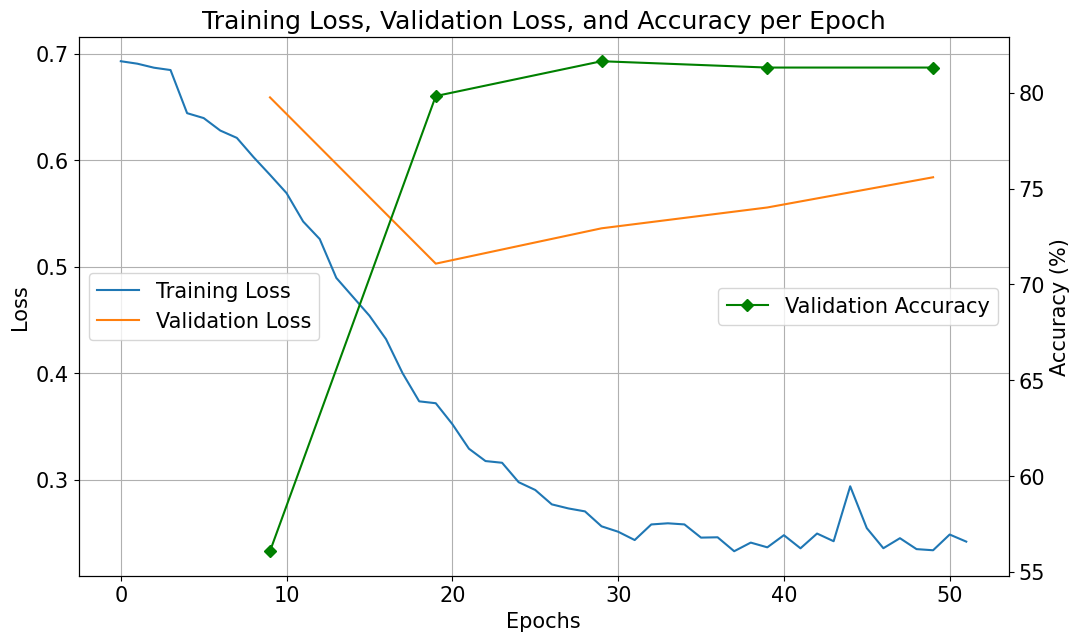

# Learning rate study

In [13]:
dataset_len = 600
import numpy as np
from arguments import prepare_finetuning_args, Args
import utils
args = prepare_finetuning_args()

# scheduler lr e wd
total_batch_size = 32 # args.batch_size
num_training_steps_per_epoch = dataset_len// total_batch_size
print(f"num_training_steps_per_epoch  {num_training_steps_per_epoch}")
args.lr = args.lr * total_batch_size / 256
args.min_lr = args.min_lr * total_batch_size / 256
args.warmup_lr = args.warmup_lr * total_batch_size / 256
print(f"[INFO] LR scaled: {args.lr}, warmup_lr: {args.warmup_lr}, min_lr: {args.min_lr}")

lr_schedule_values = utils.cosine_scheduler(
        args.lr, args.min_lr, args.epochs, num_training_steps_per_epoch,
        warmup_epochs=args.warmup_epochs, start_warmup_value=args.warmup_lr,  warmup_steps=args.warmup_steps)
#print(f"lr_schedule_values {lr_schedule_values}")

num_training_steps_per_epoch  18
[INFO] LR scaled: 6.25e-06, warmup_lr: 1.25e-07, min_lr: 1.25e-06
Set warmup steps = 1800


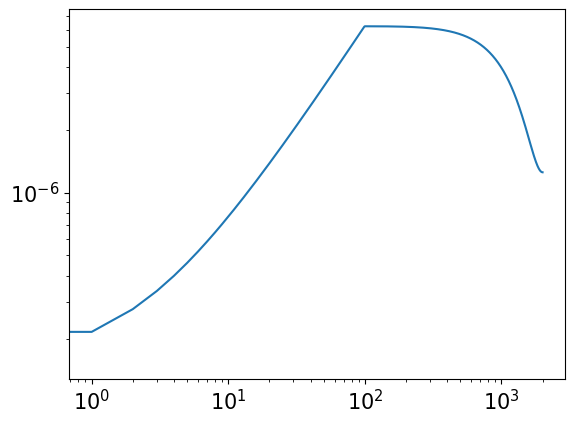

In [14]:
# da steps a epoche
lr_epochs = np.array(lr_schedule_values).reshape(args.epochs, num_training_steps_per_epoch).mean(axis=1)
plt.plot(range(args.epochs), lr_epochs)
plt.yscale('log')
plt.xscale('log')

# Verifica training